In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from typing import Dict

# custom libs
import sys
sys.path.append("..")
from src.libs.dynamicFPC import K_dFPC, W_dFPC
from src.libs.plotting import set_plotting_configs
from src.libs.transformations import obtain_densities, obtain_lqds, obtain_densities_from_lqd
from src.libs.forecasting import KLdiv, JSdiv, L_norm, get_metrics, adf_test, kpss_test, fit_var, select_order_ic, overall_KLD, overall_JSD, overall_Lnorm
from src.libs.preprocessing import align_and_normalize_density, align_densities

In [2]:
# Dados
data_path = "../data/processed/"
returns_path = ''.join([data_path, 'ibovespa_treated.xlsx'])
df = pd.read_excel(returns_path, index_col="time")
df.head()

,2024-12-02,2024-12-03,2024-12-04,2024-12-05,2024-12-06,2024-12-09,2024-12-10,2024-12-11,2024-12-12,2024-12-13,...,2025-11-14,2025-11-17,2025-11-18,2025-11-19,2025-11-21,2025-11-24,2025-11-25,2025-11-26,2025-11-27,2025-11-28
time,,,,,,,,,,,,,,,,,,,,,
10:00:00,0.000011,-0.000372,-0.000035,0.007233,-0.001305,-0.000459,0.002388,0.002212,-0.008001,-0.000824,...,-0.000957,-0.002307,-0.003734,-0.005020,-0.001139,-0.000255,0.002339,0.004176,-0.000224,-0.000238
10:05:00,-0.002271,0.003372,0.001716,0.005538,0.000069,0.006429,0.002343,0.001918,-0.007582,-0.000413,...,-0.001522,0.000739,-0.000613,0.000306,-0.002021,-0.000810,0.001557,-0.001565,-0.000193,0.002906
10:10:00,-0.000582,0.002832,-0.000502,0.000739,0.000261,0.001891,0.000775,-0.001172,0.000216,-0.000432,...,0.000360,-0.000105,-0.000159,-0.000362,0.000092,0.001131,0.001170,0.000202,0.000556,0.000475
10:15:00,-0.001997,0.001091,0.000111,-0.000192,0.000407,-0.001392,-0.000477,-0.001526,0.000198,-0.001821,...,0.001121,-0.000284,0.003272,-0.001107,-0.001012,-0.000174,0.001002,0.001815,-0.000168,0.000973
10:20:00,-0.000037,-0.000505,-0.000327,-0.000580,-0.000436,-0.000405,0.001263,0.000676,-0.002667,0.001033,...,0.000449,0.000335,0.000853,0.000981,-0.000057,-0.000096,0.000832,0.001951,0.001060,-0.001004


In [3]:
#
M=3000
df_densities_supports, df_densities = obtain_densities(df, M=M)
df_densities.head()

,2024-12-02,2024-12-03,2024-12-04,2024-12-05,2024-12-06,2024-12-09,2024-12-10,2024-12-11,2024-12-12,2024-12-13,...,2025-11-14,2025-11-17,2025-11-18,2025-11-19,2025-11-21,2025-11-24,2025-11-25,2025-11-26,2025-11-27,2025-11-28
0,26.484908,26.956133,43.192058,125.280911,22.281346,38.967352,16.381520,14.790396,14.755901,68.336475,...,56.055614,22.715586,14.822458,15.843866,32.781883,18.742967,33.634914,25.011205,59.591366,35.178493
1,26.549913,26.973634,43.381074,126.228831,22.328213,39.236235,16.389919,14.873119,14.785411,68.447117,...,56.269242,22.760257,14.822055,15.843451,32.878703,18.745446,33.688952,25.117131,59.739446,35.313673
2,26.614794,26.990503,43.570813,127.181415,22.375076,39.506838,16.398066,14.956030,14.814484,68.557193,...,56.483268,22.804829,14.820845,15.842209,32.975476,18.747281,33.742663,25.223321,59.886899,35.448818
3,26.679553,27.006743,43.761277,128.138661,22.421938,39.779179,16.405963,15.039127,14.843118,68.666702,...,56.697690,22.849304,14.818828,15.840138,33.072200,18.748473,33.796047,25.329778,60.033721,35.583923
4,26.744189,27.022353,43.952468,129.100567,22.468800,40.053275,16.413611,15.122411,14.871311,68.775642,...,56.912509,22.893683,14.816005,15.837239,33.168874,18.749022,33.849104,25.436506,60.179908,35.718987


In [4]:
lqdSup, df_lqds, c = obtain_lqds(df_densities_supports, df_densities) 

df_lqds.head()

Density does not integrate to 1 with tolerance 1e-5 - renormalizing now.
Density does not integrate to 1 with tolerance 1e-5 - renormalizing now.
Density does not integrate to 1 with tolerance 1e-5 - renormalizing now.
Density does not integrate to 1 with tolerance 1e-5 - renormalizing now.
Density does not integrate to 1 with tolerance 1e-5 - renormalizing now.
Density does not integrate to 1 with tolerance 1e-5 - renormalizing now.
Density does not integrate to 1 with tolerance 1e-5 - renormalizing now.
Density does not integrate to 1 with tolerance 1e-5 - renormalizing now.
Density does not integrate to 1 with tolerance 1e-5 - renormalizing now.
Density does not integrate to 1 with tolerance 1e-5 - renormalizing now.
Density does not integrate to 1 with tolerance 1e-5 - renormalizing now.
Density does not integrate to 1 with tolerance 1e-5 - renormalizing now.
Density does not integrate to 1 with tolerance 1e-5 - renormalizing now.
Density does not integrate to 1 with tolerance 1e-5

,2024-12-02,2024-12-03,2024-12-04,2024-12-05,2024-12-06,2024-12-09,2024-12-10,2024-12-11,2024-12-12,2024-12-13,...,2025-11-14,2025-11-17,2025-11-18,2025-11-19,2025-11-21,2025-11-24,2025-11-25,2025-11-26,2025-11-27,2025-11-28
0,-3.291162,-3.312394,-3.786379,-4.874534,-3.116237,-3.680875,-2.813958,-2.710720,-2.706796,-4.261699,...,-4.051187,-3.142843,-2.707978,-2.782172,-3.514932,-2.942690,-3.542755,-3.232546,-4.102072,-3.575104
1,-3.310255,-3.316082,-3.814810,-4.881368,-3.140384,-3.702151,-2.819715,-2.731040,-2.718934,-4.269305,...,-4.067698,-3.164606,-2.705502,-2.779735,-3.534229,-2.942163,-3.552304,-3.261041,-4.119707,-3.597743
2,-3.328377,-3.318838,-3.842364,-4.888140,-3.163541,-3.722958,-2.822779,-2.750731,-2.729608,-4.276613,...,-4.083808,-3.184983,-2.698051,-2.772392,-3.552744,-2.937229,-3.561328,-3.288471,-4.136204,-3.619353
3,-3.345617,-3.320690,-3.869089,-4.894851,-3.185944,-3.743319,-2.823575,-2.769824,-2.738876,-4.283633,...,-4.099535,-3.204145,-2.685456,-2.759995,-3.570518,-2.927901,-3.569855,-3.314953,-4.151642,-3.640009
4,-3.362051,-3.321665,-3.895031,-4.901503,-3.207803,-3.763260,-2.822574,-2.788360,-2.746783,-4.290372,...,-4.114894,-3.222246,-2.667462,-2.742286,-3.587599,-2.914162,-3.577909,-3.340589,-4.166091,-3.659781


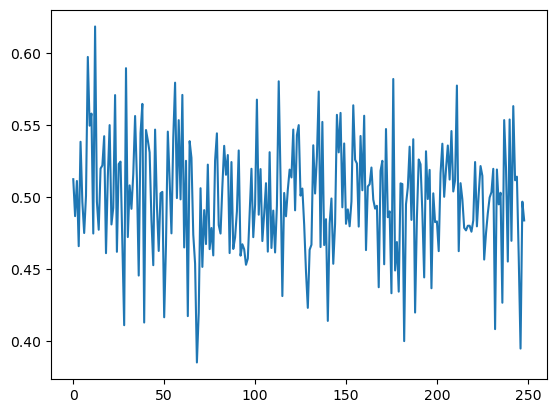

In [5]:
plt.figure()

plt.plot(c)

plt.show()

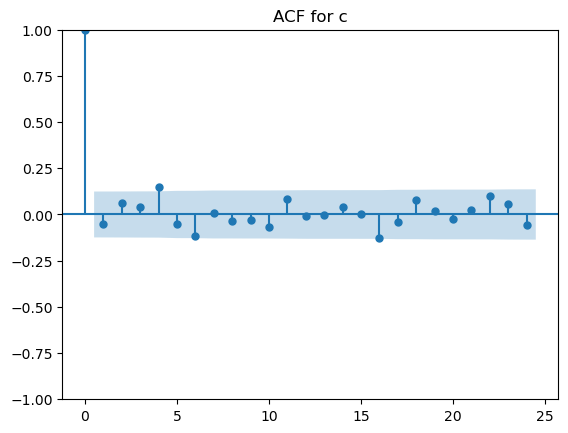

In [6]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(np.array(c))

plt.title("ACF for c")

plt.show()

# Time series modeling

In [7]:
from statsmodels.tsa.stattools import adfuller, kpss#, phillips_perron
from statsmodels.tsa.api import VAR
from sklearn.metrics import mean_squared_error
import pmdarima as pm

In [8]:
train_index = int(df_lqds.shape[1]*0.8)

train, test = df_lqds.iloc[:, :train_index], df_lqds.iloc[:, train_index:]

In [9]:
print(train.shape)
print(test.shape)

(3000, 199)
(3000, 50)


In [10]:
train.tail()

,2024-12-02,2024-12-03,2024-12-04,2024-12-05,2024-12-06,2024-12-09,2024-12-10,2024-12-11,2024-12-12,2024-12-13,...,2025-09-05,2025-09-08,2025-09-09,2025-09-10,2025-09-11,2025-09-12,2025-09-15,2025-09-16,2025-09-17,2025-09-18
2995,-2.657617,-2.932943,-3.746215,-2.344720,-2.986797,-2.465313,-3.655804,-1.678275,-2.561272,-4.661222,...,-2.129135,-4.047954,-3.117105,-3.314970,-2.832134,-4.172750,-2.551056,-2.643263,-2.874000,-3.900022
2996,-2.667253,-2.919615,-3.735301,-2.360883,-2.979693,-2.483066,-3.647285,-1.696087,-2.531472,-4.649898,...,-2.146898,-4.039881,-3.134934,-3.306945,-2.833363,-4.161180,-2.568785,-2.661119,-2.854768,-3.891835
2997,-2.673488,-2.904744,-3.723844,-2.372184,-2.971587,-2.495497,-3.638282,-1.708556,-2.501504,-4.638373,...,-2.159336,-4.031397,-3.147418,-3.297551,-2.832421,-4.149333,-2.581190,-2.673619,-2.834478,-3.883073
2998,-2.676104,-2.888199,-3.711807,-2.378805,-2.962032,-2.502861,-3.628760,-1.715938,-2.471226,-4.626642,...,-2.166702,-4.022479,-3.154811,-3.286746,-2.828974,-4.137197,-2.588521,-2.681022,-2.812996,-3.873703
2999,-2.674895,-2.869830,-3.699148,-2.380845,-2.950590,-2.505301,-3.618682,-1.718383,-2.440458,-4.614700,...,-2.169142,-4.013108,-3.157261,-3.274468,-2.822697,-4.124765,-2.590919,-2.683475,-2.790161,-3.863687


In [11]:
wavelet = 'db2'
N = 3 # wavelet decomposition level
p = 5 # lags
nt=M
dimensions = 2

WdFPC_model = W_dFPC(train.values)
WdFPC_model.fit(
    nt=nt,
    N=N,
    wavelet=wavelet,
    p=p,
    d=dimensions)

WdFPC_fitted = WdFPC_model.Yhat
w_scores = WdFPC_model.scores

c:\Users\user\Projetos\densities4risk\notebooks\..\src\libs\dynamicFPC.py:613: ComplexWarning: Casting complex values to real discards the imaginary part
  H[:, m] = pywt.waverec(coeffs_m, wavelet)
c:\Users\user\Projetos\densities4risk\notebooks\..\src\libs\dynamicFPC.py:621: ComplexWarning: Casting complex values to real discards the imaginary part
  Yhat[:, t] = mu_hat + H @ scores[:, t]


In [12]:
for i in range(w_scores.shape[0]):
    print(f"eta_{i}")
    adf_test(w_scores[i,:])
    kpss_test(w_scores[i,:])

eta_0


eta_1




c:\Users\user\anaconda3\envs\densities4risk\Lib\site-packages\numpy\_core\_asarray.py:126: ComplexWarning: Casting complex values to real discards the imaginary part
  arr = array(a, dtype=dtype, order=order, copy=None, subok=subok)
c:\Users\user\anaconda3\envs\densities4risk\Lib\site-packages\numpy\_core\_asarray.py:126: ComplexWarning: Casting complex values to real discards the imaginary part
  arr = array(a, dtype=dtype, order=order, copy=None, subok=subok)
c:\Users\user\Projetos\densities4risk\notebooks\..\src\libs\forecasting.py:24: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  statistic, p_value, lags, crit = kpss(x, regression=regression)
c:\Users\user\anaconda3\envs\densities4risk\Lib\site-packages\numpy\_core\_asarray.py:126: ComplexWarning: Casting complex values to real discards the imaginary part
  arr = array(a, dtype=dtype, order=order, copy=None, su

In [13]:
lag_maximum = 5
du=0.05

KdFPC_model = K_dFPC(train.values)
KdFPC_model.fit(
    lag_max=lag_maximum,
    alpha=0.10,
    du=0.05,
    B=1000,
    p=5,
    m=nt,
    u=lqdSup,
    select_ncomp=False,
    dimension=dimensions
)

KdFPC_fitted = KdFPC_model.fitted_values
k_scores = KdFPC_model.etahat

In [14]:
for i in range(k_scores.shape[0]):
    print(f"eta_{i}")
    adf_test(k_scores[i,:])
    kpss_test(k_scores[i,:])

eta_0


eta_1




c:\Users\user\Projetos\densities4risk\notebooks\..\src\libs\forecasting.py:24: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  statistic, p_value, lags, crit = kpss(x, regression=regression)
c:\Users\user\Projetos\densities4risk\notebooks\..\src\libs\forecasting.py:24: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  statistic, p_value, lags, crit = kpss(x, regression=regression)


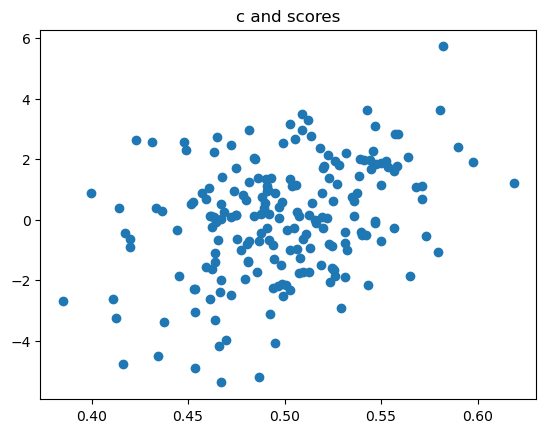

In [15]:
plt.figure()

plt.scatter(c[:train_index], k_scores[1,:])

plt.title("c and scores")

plt.show()

In [16]:
W_scores = w_scores.real.T

selected_orders = select_order_ic(W_scores)
chosen_lag = selected_orders['aic']
print(f"Chosen lags: {chosen_lag} \n")
var_res = fit_var(W_scores, nlags=chosen_lag)
print(var_res.summary())

Chosen lags: 3 

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 15, Dec, 2025
Time:                     23:42:28
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    9.68198
Nobs:                     196.000    HQIC:                   9.54263
Log likelihood:          -1468.11    FPE:                    12681.4
AIC:                      9.44783    Det(Omega_mle):         11821.9
--------------------------------------------------------------------
Results for equation y1
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const         0.012378         0.896186            0.014           0.989
L1.y1         0.312311         0.072294            4.320           0.000
L1.y2         0.116902         0.104462            1.119           0.263
L2.y1

In [17]:
h = 10
w_fc = var_res.forecast(var_res.endog[-var_res.k_ar:], steps=h).T
w_fc

array([[ 3.58079203,  0.74085518,  3.86766094,  1.94122975,  1.1877935 ,
         1.21534638,  0.84695807,  0.61024504,  0.49361602,  0.37058541],
       [ 0.33341373,  0.99204728, -1.81311898, -0.47555562, -0.19628304,
        -0.38779674, -0.23644674, -0.16377729, -0.15113919, -0.11474998]])

In [18]:
K_scores = k_scores.T

selected_orders = select_order_ic(K_scores)
chosen_lag = selected_orders['bic']
var_res = fit_var(K_scores, nlags=chosen_lag)
print(var_res.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 15, Dec, 2025
Time:                     23:42:28
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    3.52869
Nobs:                     198.000    HQIC:                   3.46938
Log likelihood:          -895.375    FPE:                    30.8474
AIC:                      3.42905    Det(Omega_mle):         29.9334
--------------------------------------------------------------------
Results for equation y1
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const        -0.013177         0.204299           -0.064           0.949
L1.y1         0.459376         0.064979            7.070           0.000
L1.y2         0.080081         0.108117            0.741           0.459

Results for equation 

In [19]:
k_fc = var_res.forecast(var_res.endog[-var_res.k_ar:], steps=h).T

In [20]:
k_curve_forecast = KdFPC_model.predict(k_fc)
w_curve_forecast = WdFPC_model.predict(w_fc)
w_curve_forecast.shape

(3000, 10)

[]

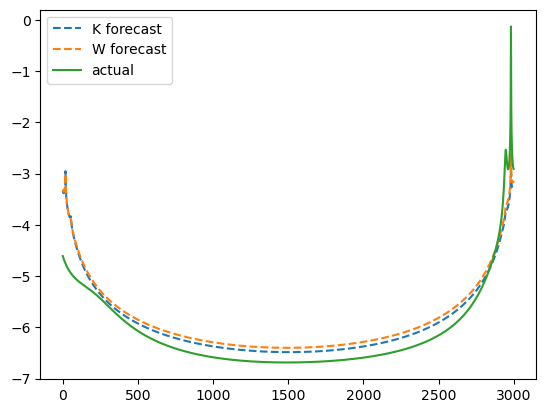

In [21]:
t=0
k_t_fc = k_curve_forecast[:,t]
w_t_fc = w_curve_forecast[:,t]

plt.figure()

plt.plot(k_t_fc, label="K forecast", linestyle="--")
plt.plot(w_t_fc, label="W forecast", linestyle="--")
plt.plot(test.values[:,t], label="actual")

plt.legend()

plt.plot()

In [22]:
df_k_fitted = pd.DataFrame(k_curve_forecast, columns=test.columns[:h])
df_w_fitted = pd.DataFrame(w_curve_forecast, columns=test.columns[:h])

df_w_fitted.tail()

,2025-09-19,2025-09-22,2025-09-23,2025-09-24,2025-09-25,2025-09-26,2025-09-29,2025-09-30,2025-10-01,2025-10-02
2995,-3.167823,-3.096371,-3.231855,-3.159055,-3.137243,-3.142993,-3.131924,-3.125483,-3.122942,-3.119632
2996,-3.164221,-3.093236,-3.227059,-3.155067,-3.133437,-3.139080,-3.128108,-3.121715,-3.119186,-3.115900
2997,-3.158426,-3.087828,-3.220240,-3.148932,-3.127455,-3.133006,-3.122116,-3.115764,-3.113244,-3.109979
2998,-3.150409,-3.080129,-3.211358,-3.140622,-3.119270,-3.124745,-3.113922,-3.107604,-3.105091,-3.101843
2999,-3.140116,-3.070090,-3.200343,-3.130079,-3.108829,-3.114239,-3.103471,-3.097180,-3.094673,-3.091438


In [23]:
model = pm.auto_arima(
    c,                         # univariate series
    seasonal=False,            # True if SARIMA
    trace=True,                # show the tried models
    error_action='ignore',     # ignore non-invertible models
    suppress_warnings=True,
     information_criterion='bic'
)

# Forecast h steps ahead
c_forecast, conf_int = model.predict(n_periods=h, return_conf_int=True)
c_forecast

Performing stepwise search to minimize bic
 ARIMA(2,0,2)(0,0,0)[0]             : BIC=inf, Time=0.21 sec
 ARIMA(0,0,0)(0,0,0)[0]             : BIC=367.467, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : BIC=inf, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : BIC=84.322, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : BIC=-858.764, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0]             : BIC=-865.195, Time=0.15 sec
 ARIMA(2,0,0)(0,0,0)[0]             : BIC=inf, Time=0.02 sec
 ARIMA(3,0,1)(0,0,0)[0]             : BIC=-845.835, Time=0.17 sec
 ARIMA(1,0,2)(0,0,0)[0]             : BIC=-865.114, Time=0.20 sec
 ARIMA(3,0,0)(0,0,0)[0]             : BIC=inf, Time=0.02 sec
 ARIMA(3,0,2)(0,0,0)[0]             : BIC=inf, Time=0.25 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : BIC=-872.128, Time=0.42 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : BIC=-876.274, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : BIC=-881.887, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : BIC=-886.783, Time=0.03

array([0.49891598, 0.49891598, 0.49891598, 0.49891598, 0.49891598,
       0.49891598, 0.49891598, 0.49891598, 0.49891598, 0.49891598])

In [24]:
wvlt_bkw_supports, wvlt_bkw_densities = obtain_densities_from_lqd(
                                                            df_w_fitted,
                                                            lqdSup,
                                                            c_forecast
)

In [25]:
kle_bkw_supports, kle_bkw_densities = obtain_densities_from_lqd(
                                                            df_k_fitted,
                                                            lqdSup,
                                                            c_forecast
)

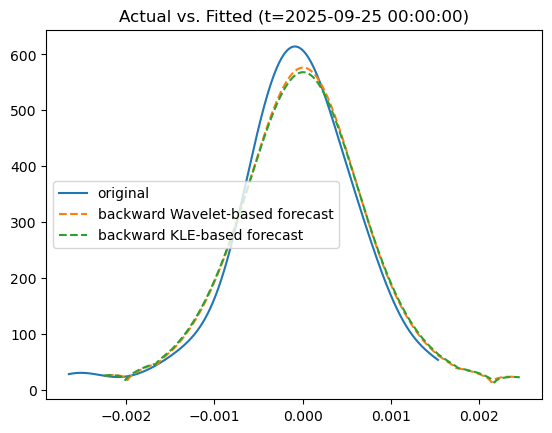

In [26]:
# Reconstrói curva a partir de estimação

t=4
col_name = df_w_fitted.columns[t]

plt.figure()

plt.plot(df_densities_supports.loc[:,col_name], df_densities.loc[:,col_name], label="original")

plt.plot(wvlt_bkw_supports.loc[:,col_name], wvlt_bkw_densities.loc[:,col_name], label="backward Wavelet-based forecast", linestyle="--")
plt.plot(kle_bkw_supports.loc[:,col_name], kle_bkw_densities.loc[:,col_name], label="backward KLE-based forecast", linestyle="--")

plt.legend()
plt.title(f"Actual vs. Fitted (t={col_name})")

plt.show()

# Análise em grid comum

In [27]:
f_supp = df_densities_supports.iloc[:,train.shape[1]+t]
f = df_densities.iloc[:,train.shape[1]+t]
fhat_supp = wvlt_bkw_supports.iloc[:,t]
fhat = wvlt_bkw_densities.iloc[:,t]

In [28]:

supp, f, f_hat = align_and_normalize_density(f_supp, f, fhat_supp, fhat)

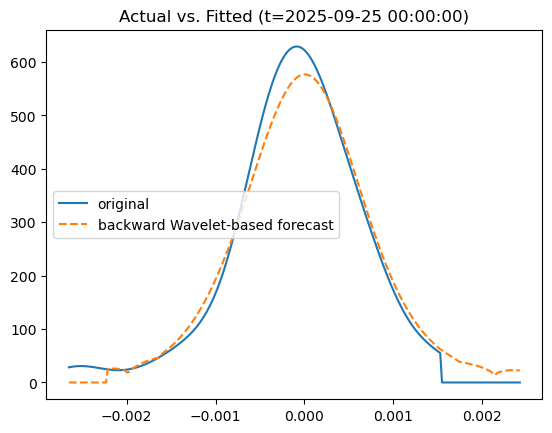

In [29]:
plt.figure()

plt.plot(supp, f, label="original")

plt.plot(supp, f_hat, label="backward Wavelet-based forecast", linestyle="--")

plt.legend()
plt.title(f"Actual vs. Fitted (t={col_name})")

plt.show()

In [30]:
get_metrics(f, f_hat)

{'KLD': np.float64(0.17847044221667646),
 'JSD': np.float64(0.008269015162270788),
 'L1_norm': np.float64(0.11860901091908226),
 'L2_norm': np.float64(0.00946352058949018),
 'LINF_norm': np.float64(0.0014558538459215446)}

In [31]:
class FTSfc:
    # TODO: adicionar funções que recebem uma matrix de dados funcionais e obtêm scores e autofunções (wavelets e KL)
    # TODO: adicionar função de ajuste de suporte para comparar forecast com densidade original
    def __init__(self, Y, c):
        """ Y: scores (d,T) matrix"""
        self.Y = Y
        self.c = c
        self.cols = Y.columns
        self.lags = None
        self.model = None
        self.horizon = None
        self.scores_forecast = None
        self.c_forecast = None

    def scores_stationarity(self):
        for i in range(self.Y.shape[0]):
            print(f"eta_{i}")
            adf_test(w_scores[i,:])
            kpss_test(w_scores[i,:])

    def choose_lags(self, criteria):
        """criteria: [aic, bic, hqic] """

        Y = Y.real.T
        selected_orders = select_order_ic(Y)
        chosen_lag = selected_orders[criteria]
        print(f"Chosen lags: {chosen_lag} \n")
        
        self.lags = chosen_lag

    def fit(self, nlags=None):
        if self.lags is None:
            model_lags = self.lags

        var_res = fit_var(self.Y.T, nlags=model_lags)
        print(var_res.summary())
        
        self.model = var_res

    def forecast(self, h):
        self.horizon = h

        # Scores
        scores_forecast = self.var_res.forecast(self.var_res.endog[-self.var_res.k_ar:], steps=h).T
        self.scores_forecast = scores_forecast

        # c = F(0)
        model = pm.auto_arima(
            c,                         # univariate series
            seasonal=False,            # True if SARIMA
            trace=True,                # show the tried models
            error_action='ignore',     # ignore non-invertible models
            suppress_warnings=True,
            information_criterion='bic'
        )
        c_forecast, conf_int = model.predict(n_periods=h, return_conf_int=True)
        self.c_forecast = c_forecast    

# Medidas de acurácia

## Kullback-Leibler Divergence

KLdiv -> flexmix

In [32]:
x = np.linspace(-3, 3, 200)
from scipy.stats import norm, uniform, t
y = pd.DataFrame(np.array([uniform.pdf(x), norm.pdf(x), t.pdf(x, df=10)]).T, columns=["Uniform", "Normal", "t"])
y.tail()

,Uniform,Normal,t
195,0.0,0.006318,0.014053
196,0.0,0.005790,0.013338
197,0.0,0.005301,0.012659
198,0.0,0.004849,0.012013
199,0.0,0.004432,0.011401


<Axes: >

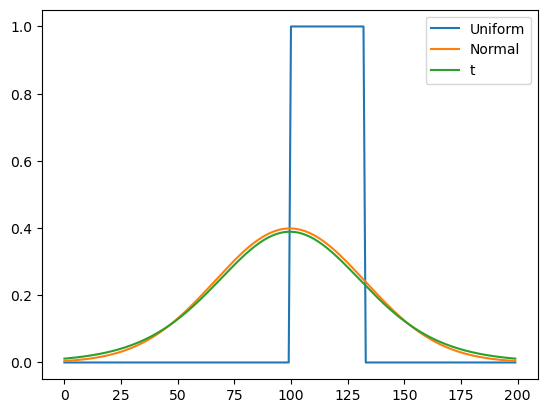

In [33]:
y.plot()

In [34]:
get_metrics(y.t, y.Normal)

{'KLD': np.float64(0.005138101245877106),
 'JSD': np.float64(0.001164551289695863),
 'L1_norm': np.float64(0.04428707494140814),
 'L2_norm': np.float64(0.0033196241537529147),
 'LINF_norm': np.float64(0.0003065887484562709)}

## Dados reais

In [42]:
f_supp = df_densities_supports.loc[:,kle_bkw_supports.columns]
f = df_densities.loc[:,kle_bkw_supports.columns]
fhat_supp = kle_bkw_supports
fhat = kle_bkw_densities

In [43]:
df_supp, df_f, df_fhat = align_densities(f_supp, f, fhat_supp, fhat, wvlt_bkw_densities.columns)

In [44]:
overall_KLD(df_f, df_fhat, len(df_fhat.columns))

np.float64(0.6638)

In [45]:
overall_JSD(df_f, df_fhat, len(df_fhat.columns))

np.float64(0.2128)

In [46]:
overall_Lnorm(df_f, df_fhat, len(df_fhat.columns), "LINF")

np.float64(0.0041)

# CLASSES

In [ ]:
class ModifiedLQDT:
    def __init__(self, eps=1e-6, support_strategy="dynamic"):
        self.eps = eps
        self.support_strategy = support_strategy

    def fit(self, densities, supports):
        # learn reference support, constants, etc.
        return self

    def transform(self, densities, supports):
        # return LQD + c_t
        return lqd, c

    def inverse_transform(self, lqd, c):
        # return density, support
        return densities, supports

In [ ]:
class WaveletKLE:
    def __init__(self, wavelet="db4", level=4, n_components=5):
        self.wavelet = wavelet
        self.level = level
        self.n_components = n_components

    def fit(self, lqd):
        # compute eigenfunctions
        return self

    def transform(self, lqd):
        # return scores
        return scores

    def inverse_transform(self, scores):
        return lqd_hat

In [ ]:
class ScoreForecasterVAR:
    def __init__(self, max_lag=5):
        self.max_lag = max_lag
        self.model = None

    def fit(self, scores, c):
        # fit VAR
        return self

    def forecast(self, h=1):
        return scores_hat, c_hat
    
    def rolling_cv_loss(self, scores, c, loss_fn, initial_window):
        ...

In [ ]:
class DensityForecastPipeline:
    def __init__(self, lqdt, kle, forecaster):
        self.lqdt = lqdt
        self.kle = kle
        self.forecaster = forecaster

    def fit(self, densities, supports):
        lqd, c = self.lqdt.fit(densities, supports).transform(densities, supports)
        scores = self.kle.fit(lqd).transform(lqd)
        self.forecaster.fit(scores, c)
        return self

    def forecast(self, h=1):
        scores_hat, c_hat = self.forecaster.forecast(h)
        lqd_hat = self.kle.inverse_transform(scores_hat)
        dens_hat, supp_hat = self.lqdt.inverse_transform(lqd_hat, c_hat)
        return dens_hat, supp_hat

In [ ]:
param_grid = [
    {"kle": WaveletKLE(level=3, n_components=5),
     "forecaster": ScoreForecasterVAR(max_lag=2)},
    {"kle": WaveletKLE(level=4, n_components=7),
     "forecaster": ScoreForecasterVAR(max_lag=3)}
]